In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 利用Pandas读入

* Series：类似于一维数组的对象，是由一组数据（各种NumPy数据类型）及一组与之相关的数据标签（索引）组成。仅由一组数据也可产生Series 对象。注意：Series 中的索引值是可以重复的。
* DataFrame：表格型的数据结构，由一组有序的列组成，每列可以是不同的数据类型（数值、字符串、布尔型等）。DataFrame 既有行索引，也有列索引，可以看作是Series 组成的字典。


  在Pandas中的概念 dataFrame ，dataSeries
  https://blog.csdn.net/pxhdky/article/details/82960659

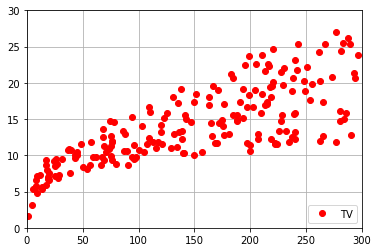

In [26]:
path = 'Advertising.csv'
data = pd.read_csv(path)  
# # 绘制1
plt.plot(data['TV'], data['Sales'], 'ro', label='TV')
plt.legend(loc='lower right')
plt.xlim((0,300))
plt.ylim((0,30))
plt.grid()
plt.show()

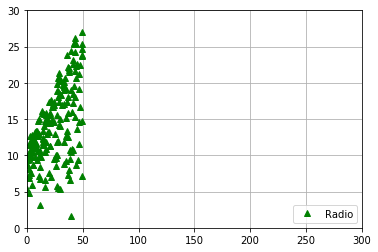

In [27]:
# # 绘制1
plt.plot(data['Radio'], data['Sales'], 'g^', label='Radio')
plt.legend(loc='lower right')
plt.xlim((0,300))
plt.ylim((0,30))
plt.grid()
plt.show()

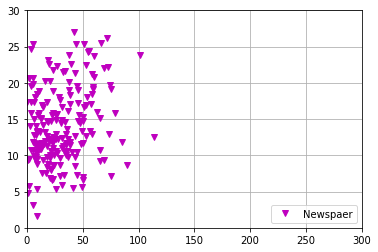

In [28]:
plt.plot(data['Newspaper'], data['Sales'], 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.xlim((0,300))
plt.ylim((0,30))
plt.grid()
plt.show()

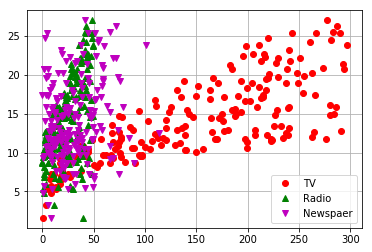

In [29]:
# # 绘制1
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
lineRegresion = LinearRegression()

model = lineRegresion.fit(x_train, y_train)
print(lineRegresion.coef_)
print(lineRegresion.intercept_)

[0.04656457 0.17915812 0.00345046]
2.8769666223179318


In [47]:
#待定的 alpha
model1 = Lasso()
alpha_can = np.logspace(-3, 2, 10)
lasso_model = GridSearchCV(model1, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x, y)
print('超参数：\n', lasso_model.best_params_)

超参数：
 {'alpha': 2.1544346900318843}


In [45]:
y_hat = lasso_model.predict(np.array(x_test))
print("Best Score" + lasso_model.best_score_.astype(str))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

Best Score0.8884584261876995
1.915226313829853 1.383917018404591


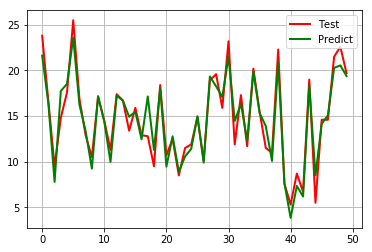

In [46]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()